In [8]:
!pip install tensorflow scikit-learn matplotlib numpy pandas pyarrow fastparquet


In [9]:
from datasets import load_dataset

ds = load_dataset("Pranavkpba2000/skin_cancer_complete_dataset_resized")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/669 [00:00<?, ?B/s]

data/train-00000-of-00001-99b15caa58d9e2(…):   0%|          | 0.00/163M [00:00<?, ?B/s]

data/test-00000-of-00001-879f0c414cbffe0(…):   0%|          | 0.00/40.9M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/28516 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7105 [00:00<?, ? examples/s]

In [11]:
lsample = ds["train"][0]
print(sample.keys())   # shows available fields, e.g. 'image', 'label'

img = sample["image"]  # this is a PIL image
label = sample["label"]

img.show()

dict_keys(['image', 'label'])


In [15]:
# -------------------------------
# STEP 1: Mount Google Drive
# -------------------------------
from google.colab import drive
drive.mount('/content/drive')

# Set dataset save location
import os
base_dir = "/content/drive/MyDrive/skin_dataset"
os.makedirs(base_dir, exist_ok=True)

# -------------------------------
# STEP 2: Install Hugging Face Datasets
# -------------------------------
!pip install datasets

from datasets import load_dataset
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import io # Import the io module

# -------------------------------
# STEP 3: Load Dataset from Hugging Face
# -------------------------------
# Example dataset (replace with another repo id if needed)
dataset = load_dataset("Pranavkpba2000/skin_cancer_complete_dataset_resized")


# For demo, we'll only take 1000 images
all_data = dataset["train"].shuffle(seed=42).select(range(1000))

# Convert the dataset to a pandas DataFrame for train_test_split compatibility
all_data_df = all_data.to_pandas()


# -------------------------------
# STEP 4: Split into Train / Val / Test
# -------------------------------
train_val_df, test_df = train_test_split(all_data_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)
# 60% train, 20% val, 20% test

# Convert back to Dataset objects if needed for the saving step
from datasets import Dataset
train = Dataset.from_pandas(train_df)
val = Dataset.from_pandas(val_df)
test = Dataset.from_pandas(test_df)


splits = {
    "train": train,
    "val": val,
    "test": test
}

# -------------------------------
# STEP 5: Save Images into Folders
# -------------------------------
for split_name, split_data in splits.items():
    split_dir = os.path.join(base_dir, split_name)
    os.makedirs(split_dir, exist_ok=True)

    for i, item in enumerate(split_data):
        # Load the image from bytes using PIL
        img_bytes = item["image"]["bytes"]
        img = Image.open(io.BytesIO(img_bytes))

        label = str(item["label"])

        class_dir = os.path.join(split_dir, label)
        os.makedirs(class_dir, exist_ok=True)

        img.save(os.path.join(class_dir, f"{i}.jpg"))

print("✅ Dataset saved in Google Drive at:", base_dir)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Dataset saved in Google Drive at: /content/drive/MyDrive/skin_dataset


In [16]:
from datasets import load_dataset

ds = load_dataset("Ewakaa/pneumonia_classification_chest_xray")

README.md:   0%|          | 0.00/624 [00:00<?, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/144M [00:00<?, ?B/s]

data/validation-00000-of-00001.parquet:   0%|          | 0.00/41.2M [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/4077 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1165 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/582 [00:00<?, ? examples/s]

In [17]:
lsample = ds["train"][0]
print(sample.keys())   # shows available fields, e.g. 'image', 'label'

img = sample["image"]  # this is a PIL image
label = sample["label"]

img.show()

dict_keys(['image', 'label'])


In [18]:
# -------------------------------
# STEP 1: Mount Google Drive
# -------------------------------
from google.colab import drive
drive.mount('/content/drive')

# Set dataset save location
import os
base_dir = "/content/drive/MyDrive/pneumonia_dataset"
os.makedirs(base_dir, exist_ok=True)

# -------------------------------
# STEP 2: Install Hugging Face Datasets
# -------------------------------
!pip install datasets

from datasets import load_dataset
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import io # Import the io module

# -------------------------------
# STEP 3: Load Dataset from Hugging Face
# -------------------------------
# Example dataset (replace with another repo id if needed)
dataset = load_dataset("Ewakaa/pneumonia_classification_chest_xray")


# For demo, we'll only take 1000 images
all_data = dataset["train"].shuffle(seed=42).select(range(1000))

# Convert the dataset to a pandas DataFrame for train_test_split compatibility
all_data_df = all_data.to_pandas()


# -------------------------------
# STEP 4: Split into Train / Val / Test
# -------------------------------
train_val_df, test_df = train_test_split(all_data_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)
# 60% train, 20% val, 20% test

# Convert back to Dataset objects if needed for the saving step
from datasets import Dataset
train = Dataset.from_pandas(train_df)
val = Dataset.from_pandas(val_df)
test = Dataset.from_pandas(test_df)


splits = {
    "train": train,
    "val": val,
    "test": test
}

# -------------------------------
# STEP 5: Save Images into Folders
# -------------------------------
for split_name, split_data in splits.items():
    split_dir = os.path.join(base_dir, split_name)
    os.makedirs(split_dir, exist_ok=True)

    for i, item in enumerate(split_data):
        # Load the image from bytes using PIL
        img_bytes = item["image"]["bytes"]
        img = Image.open(io.BytesIO(img_bytes))

        label = str(item["label"])

        class_dir = os.path.join(split_dir, label)
        os.makedirs(class_dir, exist_ok=True)

        img.save(os.path.join(class_dir, f"{i}.jpg"))

print("✅ Dataset saved in Google Drive at:", base_dir)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Dataset saved in Google Drive at: /content/drive/MyDrive/pneumonia_dataset


In [19]:
# Install (Colab)
!pip install -q tensorflow scikit-learn matplotlib

# Imports
import os, random, math, itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, classification_report

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50


In [20]:
# Reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# GPU?
print("TF version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))


TF version: 2.19.0
GPU available: []


In [21]:
from google.colab import drive
drive.mount('/content/drive')

# === Change these to your actual folders in Drive ===
SKIN_DATA_DIR      = "/content/drive/MyDrive/skin_dataset"        # has train/ val/ test/
PNEUMONIA_DATA_DIR = "/content/drive/MyDrive/pneumonia_dataset"   # has train/ val/ test/

# Outputs (models + plots + summary)
OUT_DIR = "/content/drive/MyDrive/Week3_outputs"
os.makedirs(OUT_DIR, exist_ok=True)
os.makedirs(f"{OUT_DIR}/plots", exist_ok=True)
os.makedirs(f"{OUT_DIR}/models", exist_ok=True)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
def build_datasets(root_dir, img_size=(128,128), batch_size=32):
    # train
    train_ds = tf.keras.utils.image_dataset_from_directory(
        os.path.join(root_dir, "train"),
        labels="inferred", label_mode="int",
        image_size=img_size, batch_size=batch_size, shuffle=True, seed=SEED
    )
    # val
    val_ds = tf.keras.utils.image_dataset_from_directory(
        os.path.join(root_dir, "val"),
        labels="inferred", label_mode="int",
        image_size=img_size, batch_size=batch_size, shuffle=False
    )
    # test
    test_ds = tf.keras.utils.image_dataset_from_directory(
        os.path.join(root_dir, "test"),
        labels="inferred", label_mode="int",
        image_size=img_size, batch_size=batch_size, shuffle=False
    )

    class_names = train_ds.class_names  # Get class names here

    # normalize [0,1]
    rescale = tf.keras.layers.Rescaling(1./255)
    train_ds = train_ds.map(lambda x,y: (rescale(x), y))
    val_ds   = val_ds.map(lambda x,y: (rescale(x), y))
    test_ds  = test_ds.map(lambda x,y: (rescale(x), y))

    # cache + prefetch
    train_ds = train_ds.cache().prefetch(tf.data.AUTOTUNE)
    val_ds   = val_ds.cache().prefetch(tf.data.AUTOTUNE)
    test_ds  = test_ds.cache().prefetch(tf.data.AUTOTUNE)

    return train_ds, val_ds, test_ds, class_names

In [28]:
IMG_SIZE   = (128,128)
BATCH_SIZE = 32

# Skin Cancer
skin_train, skin_val, skin_test, skin_classes = build_datasets(SKIN_DATA_DIR, IMG_SIZE, BATCH_SIZE)
print("Skin classes:", skin_classes)

# Pneumonia
pneu_train, pneu_val, pneu_test, pneu_classes = build_datasets(PNEUMONIA_DATA_DIR, IMG_SIZE, BATCH_SIZE)
print("Pneumonia classes:", pneu_classes)

Found 600 files belonging to 8 classes.
Found 200 files belonging to 8 classes.
Found 200 files belonging to 8 classes.
Skin classes: ['0', '1', '2', '3', '4', '5', '6', '7']
Found 600 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Pneumonia classes: ['0', '1']


In [29]:
def plot_history(history, title_prefix, out_prefix):
    acc      = history.history.get("accuracy", [])
    val_acc  = history.history.get("val_accuracy", [])
    loss     = history.history.get("loss", [])
    val_loss = history.history.get("val_loss", [])

    # Accuracy
    plt.figure()
    plt.plot(acc, label="train_acc")
    plt.plot(val_acc, label="val_acc")
    plt.title(f"{title_prefix} Accuracy")
    plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.legend()
    acc_path = f"{OUT_DIR}/plots/{out_prefix}_acc.png"
    plt.savefig(acc_path, bbox_inches="tight"); plt.show()

    # Loss
    plt.figure()
    plt.plot(loss, label="train_loss")
    plt.plot(val_loss, label="val_loss")
    plt.title(f"{title_prefix} Loss")
    plt.xlabel("Epoch"); plt.ylabel("BinaryCrossentropy"); plt.legend()
    loss_path = f"{OUT_DIR}/plots/{out_prefix}_loss.png"
    plt.savefig(loss_path, bbox_inches="tight"); plt.show()

    return acc_path, loss_path


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0867 - loss: -1.4944

19/19 ━━━━━━━━━━━━━━━━━━━━ 78s 4s/step - accuracy: 0.0867 - loss: -1.5398 - val_accuracy: 0.0800 - val_loss: -4.1684
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0766 - loss: -5.4931

19/19 ━━━━━━━━━━━━━━━━━━━━ 56s 3s/step - accuracy: 0.0770 - loss: -5.5296 - val_accuracy: 0.0800 - val_loss: -7.5888
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0766 - loss: -8.9720

19/19 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.0770 - loss: -9.0051 - val_accuracy: 0.0800 - val_loss: -10.8612
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0766 - loss: -12.2213

19/19 ━━━━━━━━━━━━━━━━━━━━ 56s 3s/step - accuracy: 0.0770 - loss: -12.2510 - val_accuracy: 0.0800 - val_loss: -14.0613
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0766 - loss: -16.1046

19/19 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step - accuracy: 0.0770 - loss: -16.1380 - val_accuracy: 0.0800 - val_loss: -17.3255
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.0766 - loss: -19.4613

19/19 ━━━━━━━━━━━━━━━━━━━━ 75s 4s/step - accuracy: 0.0770 - loss: -19.4992 - val_accuracy: 0.0800 - val_loss: -20.6249
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.0766 - loss: -23.8825

19/19 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.0770 - loss: -23.9025 - val_accuracy: 0.0800 - val_loss: -23.9671
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0766 - loss: -26.6290

19/19 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step - accuracy: 0.0770 - loss: -26.6375 - val_accuracy: 0.0800 - val_loss: -27.2459
Epoch 9/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0766 - loss: -30.7440

19/19 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step - accuracy: 0.0770 - loss: -30.7444 - val_accuracy: 0.0800 - val_loss: -30.5235
Epoch 10/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0766 - loss: -33.7007

19/19 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.0770 - loss: -33.7069 - val_accuracy: 0.0800 - val_loss: -33.7994
Epoch 11/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0766 - loss: -37.4879

19/19 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.0770 - loss: -37.5186 - val_accuracy: 0.0800 - val_loss: -37.1121
Epoch 12/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0766 - loss: -41.0233

19/19 ━━━━━━━━━━━━━━━━━━━━ 74s 3s/step - accuracy: 0.0770 - loss: -41.0258 - val_accuracy: 0.0800 - val_loss: -40.4187
Epoch 13/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0766 - loss: -45.6568

19/19 ━━━━━━━━━━━━━━━━━━━━ 62s 3s/step - accuracy: 0.0770 - loss: -45.6465 - val_accuracy: 0.0800 - val_loss: -43.7651
Epoch 14/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0766 - loss: -47.3265

19/19 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step - accuracy: 0.0770 - loss: -47.3602 - val_accuracy: 0.0800 - val_loss: -47.0729
Epoch 15/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0766 - loss: -52.7116

19/19 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.0770 - loss: -52.7017 - val_accuracy: 0.0800 - val_loss: -50.4023
Epoch 16/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0766 - loss: -54.7523

19/19 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step - accuracy: 0.0770 - loss: -54.7313 - val_accuracy: 0.0800 - val_loss: -53.6878
Epoch 17/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0766 - loss: -60.5763

19/19 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step - accuracy: 0.0770 - loss: -60.5429 - val_accuracy: 0.0800 - val_loss: -57.0193
Epoch 18/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0766 - loss: -61.5735

19/19 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.0770 - loss: -61.5729 - val_accuracy: 0.0800 - val_loss: -60.3278
Epoch 19/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0766 - loss: -66.7586

19/19 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step - accuracy: 0.0770 - loss: -66.7675 - val_accuracy: 0.0800 - val_loss: -63.6476
Epoch 20/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0766 - loss: -69.4655

19/19 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step - accuracy: 0.0770 - loss: -69.5012 - val_accuracy: 0.0800 - val_loss: -66.9900
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.1389 - loss: -39.4200
Skin Cancer Test Accuracy: 0.0750


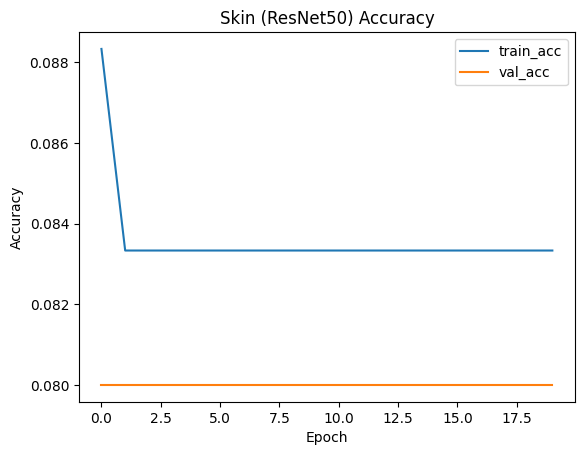

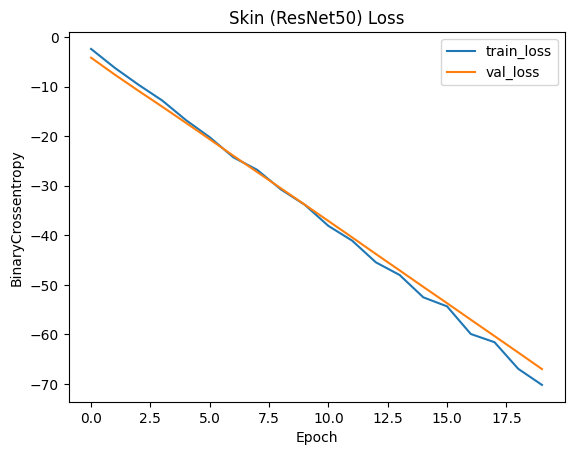

In [30]:
# Data augmentation helps on small medical datasets
skin_aug = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.1),
], name="skin_augment")

# ResNet50 base (frozen)
base_resnet = ResNet50(weights="imagenet", include_top=False, input_shape=IMG_SIZE+(3,))
base_resnet.trainable = False

inputs  = layers.Input(shape=IMG_SIZE+(3,))
x       = skin_aug(inputs)
x       = base_resnet(x, training=False)
x       = layers.GlobalAveragePooling2D()(x)
x       = layers.Dropout(0.3)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

skin_model = models.Model(inputs, outputs, name="Skin_ResNet50")

skin_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

skin_ckpt = f"{OUT_DIR}/models/skin_resnet50.h5"
callbacks_skin = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(skin_ckpt, monitor="val_loss", save_best_only=True)
]

history_skin = skin_model.fit(
    skin_train, validation_data=skin_val, epochs=20, callbacks=callbacks_skin
)

skin_test_loss, skin_test_acc = skin_model.evaluate(skin_test)
print(f"Skin Cancer Test Accuracy: {skin_test_acc:.4f}")

# Plots
skin_acc_png, skin_loss_png = plot_history(history_skin, "Skin (ResNet50)", "skin")


Epoch 1/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 983ms/step - accuracy: 0.5649 - loss: 1.1806

19/19 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.5677 - loss: 1.1648 - val_accuracy: 0.7300 - val_loss: 0.5650
Epoch 2/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7526 - loss: 0.5108

19/19 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.7523 - loss: 0.5094 - val_accuracy: 0.7850 - val_loss: 0.4025
Epoch 3/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 978ms/step - accuracy: 0.8841 - loss: 0.3105

19/19 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.8844 - loss: 0.3094 - val_accuracy: 0.9000 - val_loss: 0.2621
Epoch 4/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9102 - loss: 0.2306 - val_accuracy: 0.8850 - val_loss: 0.2690
Epoch 5/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 907ms/step - accuracy: 0.9338 - loss: 0.1723

19/19 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9339 - loss: 0.1718 - val_accuracy: 0.9000 - val_loss: 0.2265
Epoch 6/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9361 - loss: 0.1642

19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.9363 - loss: 0.1639 - val_accuracy: 0.9100 - val_loss: 0.2250
Epoch 7/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9305 - loss: 0.1522 - val_accuracy: 0.9100 - val_loss: 0.2265
Epoch 8/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9506 - loss: 0.1148 - val_accuracy: 0.9100 - val_loss: 0.2444
Epoch 9/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 893ms/step - accuracy: 0.9527 - loss: 0.1189

19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9531 - loss: 0.1186 - val_accuracy: 0.9250 - val_loss: 0.2176
Epoch 10/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.9719 - loss: 0.0838 - val_accuracy: 0.9100 - val_loss: 0.2448
Epoch 11/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 19s 979ms/step - accuracy: 0.9864 - loss: 0.0633 - val_accuracy: 0.9150 - val_loss: 0.2939
Epoch 12/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 18s 974ms/step - accuracy: 0.9862 - loss: 0.0507 - val_accuracy: 0.9100 - val_loss: 0.2651
Epoch 13/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 19s 988ms/step - accuracy: 0.9895 - loss: 0.0338 - val_accuracy: 0.9150 - val_loss: 0.2735
Epoch 14/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 1.0000 - loss: 0.0264 - val_accuracy: 0.9100 - val_loss: 0.2785
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 267ms/step - accuracy: 0.9207 - loss: 0.1920
Pneumonia Test Accuracy: 0.9200


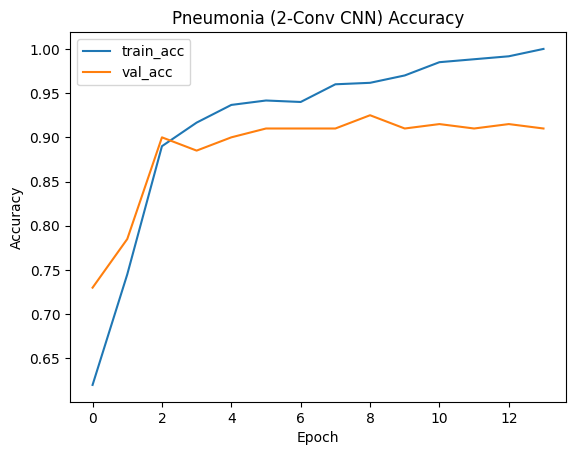

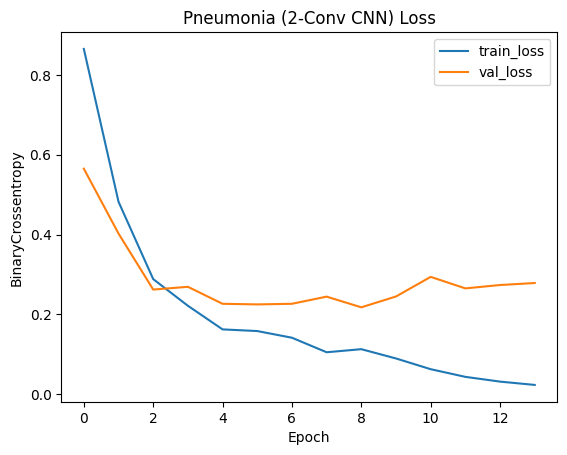

In [31]:
pneu_model = models.Sequential([
    layers.Input(shape=IMG_SIZE+(3,)),
    layers.Conv2D(32, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D(2),
    layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D(2),
    layers.Flatten(),
    layers.Dropout(0.3),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
], name="Pneumonia_CNN")

pneu_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

pneu_ckpt = f"{OUT_DIR}/models/pneumonia_cnn.h5"
callbacks_pneu = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(pneu_ckpt, monitor="val_loss", save_best_only=True)
]

history_pneu = pneu_model.fit(
    pneu_train, validation_data=pneu_val, epochs=25, callbacks=callbacks_pneu
)

pneu_test_loss, pneu_test_acc = pneu_model.evaluate(pneu_test)
print(f"Pneumonia Test Accuracy: {pneu_test_acc:.4f}")

# Plots
pneu_acc_png, pneu_loss_png = plot_history(history_pneu, "Pneumonia (2-Conv CNN)", "pneumonia")


Pneumonia AUC: 0.9770


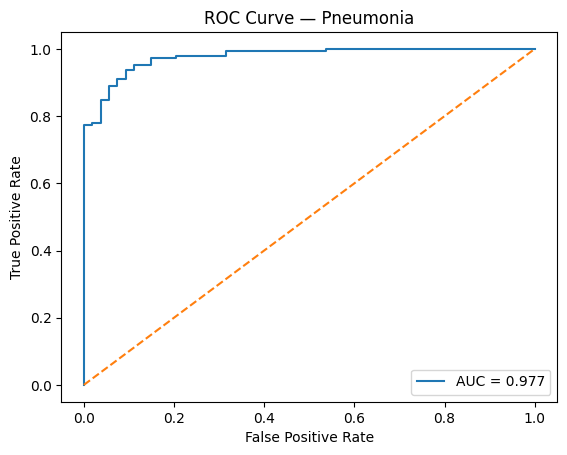

Confusion matrix:
 [[ 49   5]
 [ 11 135]]
Accuracy (thr=0.5): 0.92
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        54
           1       0.96      0.92      0.94       146

    accuracy                           0.92       200
   macro avg       0.89      0.92      0.90       200
weighted avg       0.92      0.92      0.92       200



In [32]:
# Collect y_true and predicted probabilities on test set
y_true, y_score = [], []
for images, labels in pneu_test:
    probs = pneu_model.predict(images, verbose=0).ravel()
    y_score.extend(probs.tolist())
    y_true.extend(labels.numpy().ravel().tolist())

y_true  = np.array(y_true).astype(int)
y_score = np.array(y_score)

# ROC & AUC
fpr, tpr, _ = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)
print(f"Pneumonia AUC: {roc_auc:.4f}")

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Pneumonia")
plt.legend()
pneu_roc_png = f"{OUT_DIR}/plots/pneumonia_roc.png"
plt.savefig(pneu_roc_png, bbox_inches="tight"); plt.show()

# (Optional) threshold @ 0.5: confusion matrix + accuracy
y_pred = (y_score >= 0.5).astype(int)
cm = confusion_matrix(y_true, y_pred)
print("Confusion matrix:\n", cm)
print("Accuracy (thr=0.5):", accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred, target_names=pneu_classes))


In [33]:
print("Saved models:")
print("  Skin:", skin_ckpt)
print("  Pneumonia:", pneu_ckpt)

print("Saved plots:")
print(" ", skin_acc_png)
print(" ", skin_loss_png)
print(" ", pneu_acc_png)
print(" ", pneu_loss_png)
print(" ", pneu_roc_png)


Saved models:
  Skin: /content/drive/MyDrive/Week3_outputs/models/skin_resnet50.h5
  Pneumonia: /content/drive/MyDrive/Week3_outputs/models/pneumonia_cnn.h5
Saved plots:
  /content/drive/MyDrive/Week3_outputs/plots/skin_acc.png
  /content/drive/MyDrive/Week3_outputs/plots/skin_loss.png
  /content/drive/MyDrive/Week3_outputs/plots/pneumonia_acc.png
  /content/drive/MyDrive/Week3_outputs/plots/pneumonia_loss.png
  /content/drive/MyDrive/Week3_outputs/plots/pneumonia_roc.png
